In [20]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.patches as patches

In [29]:

def fpstodur(fps):
    dur = 1/fps*1000
    return dur

def theta2V(theta):
    V_R = -62
    V_T = -55
    return (V_T+V_R)/2+(V_T-V_R)/2*np.tan(theta/2)

# 从位相到正弦波
def theta2sin(theta):
    return np.sin(theta)


path_gif = '/SanDisk/Li/LowRank_ModifiedTheta_SNN/PYTHON/gif_file/'
# 定义生成每一帧的函数
def generate_frame(t):
    x = np.linspace(0, 2*np.pi, 100)
    y = np.sin(x + np.pi * t)
    plt.figure(figsize=(8, 6))
    plt.plot(x, y)
    plt.xlim(0, 2*np.pi)
    plt.ylim(-1.5, 1.5)
    return plt

def generate_circle(angle):
    if plt:
        plt.close()
    # 定义圆的参数
    radius = 1  # 半径

    # 准备绘图
    fig, ax = plt.subplots(1,2)
    # 绘制圆
    # circle = ax[0].Circle((0, 0), radius, color='blue', fill=False)
    circle = patches.Circle((0, 0), radius, edgecolor='b', facecolor='none')
    # ax[0].add_artist(circle)
    ax[0].add_patch(circle)
    # circle = plt.Circle((0, 0), radius, color='blue', fill=False)
    # ax[0].add_artist(circle)  # Use ax[0] for the first subplot
    # 设置图像坐标轴的范围
    ax[0].set_xlim(-1.1, 1.1)
    ax[0].set_ylim(-1.1, 1.1)
    # 保证横纵坐标比例一致，确保画出来的是一个圆而不是椭圆
    ax[0].set_aspect('equal')

    # 计算点的位置
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)

    # 绘制点
    # points, = ax[0][0].plot(x, y, 'ro')  # 'ro'表示红色圆点
    points, = ax[0].plot(x, y, 'ro')  # 'ro'表示红色圆点
    # ax[0].plot(x, y, 'ro')  # 'ro'表示红色圆点
    #绘制电位
    theta = np.linspace(0, 2*np.pi, 300)
    # fig, ax = plt.subplots(1,2)
    # y = theta2V(theta)
    # V = theta2V(angle)
    y = theta2sin(theta)
    V = theta2sin(angle)
    ax[1].plot(theta,y)
    ax[1].plot(angle, V, 'ro')  # 'ro'表示红色圆点

    return plt, points


In [30]:

# 生成帧
frames = []

# for t in range(40):  # 生成30帧
#     frame = generate_frame(t/10.0)  # t/10.0 使得正弦波有旋转的效果
#     frame.savefig(f'{path_gif}frame_{t}.png')  # 保存每一帧为PNG
#     plt.close()  # 关闭图形，避免显示
#     frames.append(imageio.imread(f'{path_gif}frame_{t}.png'))  # 读取每一帧

# 绘制圆上动点
# theta = np.linspace(0, 2*np.pi, 60)  # 分成60个点来绘制圆
theta = np.linspace(0, 2*np.pi, 60)  # 分成60个点来绘制圆

for ind,angle in enumerate(theta):
    frame,points = generate_circle(angle)  
    frame.savefig(f'{path_gif}frame_{ind}.png')  # 保存每一帧为PNG
    points.remove()
    plt.close()  # 关闭图形，避免显示
    frames.append(imageio.imread(f'{path_gif}frame_{ind}.png'))  # 读取每一帧

/tmp/ipykernel_1424043/4143494226.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'{path_gif}frame_{ind}.png'))  # 读取每一帧


In [31]:

# 保存为GIF
imageio.mimwrite(f'{path_gif}sine_wave.gif', frames, duration=fpstodur(10),loop = 0)  # duration (in ms) fps = 1/(0.001*duration) 
# imageio.mimwrite(f'{path_gif}sine_wave.gif', frames, fps=10)  # duration (in ms)


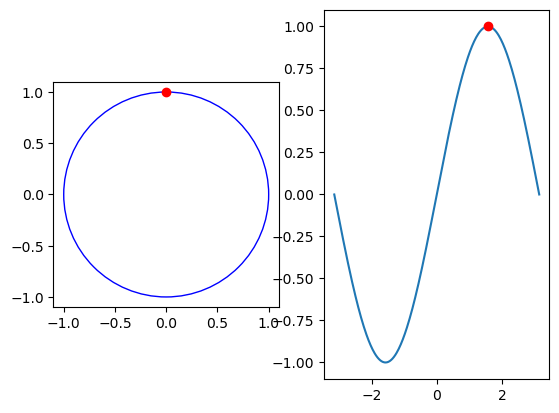

In [26]:
radius = 1  # 半径
angle = np.pi/2  # 位相
# 准备绘图
fig, ax = plt.subplots(1,2)
# 绘制圆
# circle = ax[0].Circle((0, 0), radius, color='blue', fill=False)
circle = patches.Circle((0, 0), radius, edgecolor='b', facecolor='none')
# ax[0].add_artist(circle)
ax[0].add_patch(circle)
# circle = plt.Circle((0, 0), radius, color='blue', fill=False)
# ax[0].add_artist(circle)  # Use ax[0] for the first subplot
# 设置图像坐标轴的范围
ax[0].set_xlim(-1.1, 1.1)
ax[0].set_ylim(-1.1, 1.1)
# 保证横纵坐标比例一致，确保画出来的是一个圆而不是椭圆
ax[0].set_aspect('equal')

# 计算点的位置
x = radius * np.cos(angle)
y = radius * np.sin(angle)

# 绘制点
# points, = ax[0][0].plot(x, y, 'ro')  # 'ro'表示红色圆点
points, = ax[0].plot(x, y, 'ro')  # 'ro'表示红色圆点
# ax[0].plot(x, y, 'ro')  # 'ro'表示红色圆点
#绘制电位
theta = np.linspace(-np.pi, np.pi, 300)
# fig, ax = plt.subplots(1,2)
# y = theta2V(theta)
# V = theta2V(angle)
y = theta2sin(theta)
V = theta2sin(angle)
ax[1].plot(theta,y)
ax[1].plot(angle, V, 'ro')  # 'ro'表示红色圆点